## read results 

In [987]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [988]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from hockey.visualization.pygame.animate_hockey_game import read_and_merge_dataframes

## Helper function(s)

In [989]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


## Read!

In [990]:
root_dir = "/Users/luisd/luis-simulation/fetchpuck_minmoves_del6"
model_df = read_and_merge_dataframes(root_dir, prefix_fname="model", verbose=True)
agents_df = read_and_merge_dataframes(root_dir, prefix_fname="agents", verbose=True)

From '/Users/luisd/luis-simulation/fetchpuck_minmoves_del6' I read ['/Users/luisd/luis-simulation/fetchpuck_minmoves_del6/model_1.pd', '/Users/luisd/luis-simulation/fetchpuck_minmoves_del6/model_2.pd']
From '/Users/luisd/luis-simulation/fetchpuck_minmoves_del6' I read ['/Users/luisd/luis-simulation/fetchpuck_minmoves_del6/agents_1.pd', '/Users/luisd/luis-simulation/fetchpuck_minmoves_del6/agents_2.pd']


In [991]:
print("Columns on 'model' df: %s" % list(model_df))
print("Columns on 'agents' df: %s" % list(agents_df))

Columns on 'model' df: ['Unnamed: 0', 'goals', 'puck_is_taken', 'shots', 'steps', 'timestamp']
Columns on 'agents' df: ['Step', 'AgentID', 'timestamp', 'pos_x', 'pos_y', 'speed_x', 'speed_y', 'speed_magnitude', 'topuck_x', 'topuck_y', 'angle2puck', 'last_action', 'have_puck', 'can_see_puck', 'can_reach_puck']


In [992]:
# half-ice rink
model_df = model_df.sort_values(by=('timestamp'))
model_df.index = np.arange(model_df.shape[0])
# agents
agents_df = agents_df.sort_values(by=('timestamp'))
agents_df.index = np.arange(agents_df.shape[0])

In [993]:
seconds_between_events = round(model_df.iloc[2]["timestamp"] - model_df.iloc[1]["timestamp"], 5)
seconds_between_events

0.050000000000000003

In [994]:
# max_tick = model_df["Unnamed: 0"].max()

In [995]:
max_timestamp_in_seconds = model_df["timestamp"].max()
max_timestamp_in_minutes = max_timestamp_in_seconds//60
print("Have %.2f seconds of simulation, ~%d minutes" % (max_timestamp_in_seconds, max_timestamp_in_minutes))

Have 32400.10 seconds of simulation, ~540 minutes


## Agents

In [996]:
agents_df

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_b549cc78-172a-4727-ae59-db7af945da95,0.05,99.000000,84.000000,-0.007625,-0.006470,0.01,-99.000000,-84.000000,"Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1,0,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.05,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,forward_b549cc78-172a-4727-ae59-db7af945da95,0.10,98.000381,83.000323,0.007625,0.006470,0.01,-97.875381,-82.875323,"Angle in radians = 3.141 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.01 feet/sec, direction = Ang...",False,False,False
3,1,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.10,0.125000,0.125000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,forward_b549cc78-172a-4727-ae59-db7af945da95,0.15,98.381636,83.323812,7.625091,6.469774,10.00,-98.256636,-83.198812,"Angle in radians = 3.141 (Pi/2: 1.571, Pi:3.14...","Move => speed = 10.00 feet/sec, direction = An...",False,False,False
5,2,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.15,0.125000,0.125000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,forward_b549cc78-172a-4727-ae59-db7af945da95,0.20,98.499935,83.190384,2.365990,-9.716074,10.00,-98.374935,-83.065384,"Angle in radians = 5.175 (Pi/2: 1.571, Pi:3.14...","Move => speed = 10.00 feet/sec, direction = An...",False,True,False
7,3,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.20,0.125000,0.125000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,forward_b549cc78-172a-4727-ae59-db7af945da95,0.25,98.381765,82.704580,-2.365990,-9.716074,10.00,-98.256765,-82.579580,"Angle in radians = 5.650 (Pi/2: 1.571, Pi:3.14...","Move => speed = 10.00 feet/sec, direction = An...",False,True,False
9,4,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.25,0.125000,0.125000,0.000000,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [997]:
# agents_df[
#     agents_df['last_action'].str.contains("Grab", na=False) & 
#     (agents_df['last_action'].str.contains("FAILED", na=False) == False)
# ]

[last action = 'Move => speed = 0.01 feet/sec, direction = Angle in radians = 4.124 (Pi/2: 1.571, Pi:3.142, 3/2*Pi:4.712), so I am going Vec2d(-0.005553069360898785, -0.008316454813984575)'] puck in (46.28, 36.54), agent in (46.28, 36.54), moving towards (-0.0056, -0.0083)


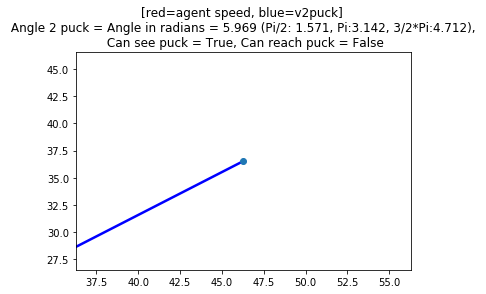

In [998]:
# For the `can_see_puck` case, debug with root_dir = "/Users/luisd/luis-simulation/fetchpuck_minmoves5", ag_idx = 24
ag_idx = 3382
x = agents_df.loc[ag_idx]["pos_x"] # [agents_df["timestamp"] == 0.65]
y = agents_df.loc[ag_idx]["pos_y"]
sp_x = agents_df.loc[ag_idx]["speed_x"]
sp_y = agents_df.loc[ag_idx]["speed_y"]
topuck_x = agents_df.loc[ag_idx]["topuck_x"]
topuck_y = agents_df.loc[ag_idx]["topuck_y"]
angletopuck = agents_df.loc[ag_idx]["angle2puck"]
lastaction = agents_df.loc[ag_idx]["last_action"]
# plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.quiver([x, x], [y, y], [sp_x, topuck_x], [sp_y, topuck_y], angles='xy', scale_units='xy', scale=1, color=['red', 'blue'])
puck_x = agents_df.loc[ag_idx - 1]["pos_x"]
puck_y = agents_df.loc[ag_idx - 1]["pos_y"]
plt.plot([(puck_x)], [(puck_y)],'o')
# plt.plot([(1,2, 3)], [(3,5, 9)],'o')
print("[last action = '%s'] puck in (%.2f, %.2f), agent in (%.2f, %.2f), moving towards (%.4f, %.4f)" % (lastaction, puck_x, puck_y, x, y, sp_x, sp_y))
min_x = min([x, x - sp_x, puck_x]) - 10
max_x = max([x, x + sp_x, puck_x]) + 10
min_y = min([y, y - sp_y, puck_y]) - 10
max_y = max([y, y + sp_y, puck_y]) + 10
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
can_see_puck = agents_df.loc[ag_idx]["can_see_puck"]
can_reach_puck = agents_df.loc[ag_idx]["can_reach_puck"]
plt.title("[red=agent speed, blue=v2puck] \n Angle 2 puck = %s, \n Can see puck = %s, Can reach puck = %s" % (angletopuck, can_see_puck, can_reach_puck))
plt.show()

In [999]:
agents_df[["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y",  "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,can_see_puck,can_reach_puck
0,forward_b549cc78-172a-4727-ae59-db7af945da95,0.05,99.000000,84.000000,-0.007625,-0.006470,True,False
1,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.05,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,forward_b549cc78-172a-4727-ae59-db7af945da95,0.10,98.000381,83.000323,0.007625,0.006470,False,False
3,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.10,0.125000,0.125000,0.000000,0.000000,NaN,NaN
4,forward_b549cc78-172a-4727-ae59-db7af945da95,0.15,98.381636,83.323812,7.625091,6.469774,False,False
5,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.15,0.125000,0.125000,0.000000,0.000000,NaN,NaN
6,forward_b549cc78-172a-4727-ae59-db7af945da95,0.20,98.499935,83.190384,2.365990,-9.716074,True,False
7,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.20,0.125000,0.125000,0.000000,0.000000,NaN,NaN
8,forward_b549cc78-172a-4727-ae59-db7af945da95,0.25,98.381765,82.704580,-2.365990,-9.716074,True,False
9,puck_7070d345-6c29-4363-8e9b-9d90de935301,0.25,0.125000,0.125000,0.000000,0.000000,NaN,NaN


## Puck movement

### Is it moving at all?

In [1000]:
all_puck_movs = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == True]
# all_puck_movs

(71775, 72270)

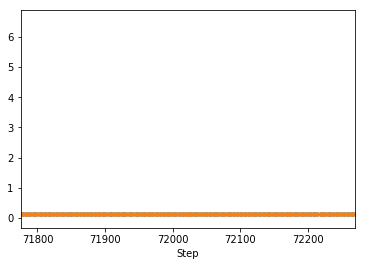

In [1001]:
# all_puck_movs.plot(x='Step', y=['pos_x', 'pos_y'], style='.')
puck_x, = plt.plot(all_puck_movs['pos_x'], '.')
puck_y, = plt.plot(all_puck_movs['pos_y'], '.')
plt.xlabel("Step")
plt.xlim([71775, 72270])

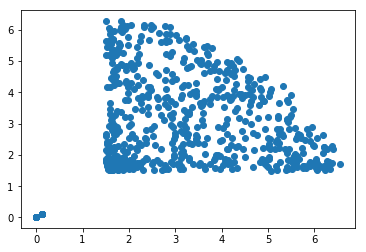

In [1002]:
plt.scatter(x=all_puck_movs['pos_x'], y=all_puck_movs['pos_y'])

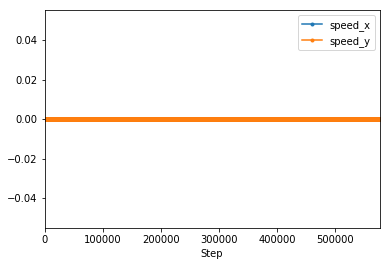

In [1003]:
all_puck_movs.plot(x='Step', y=['speed_x', 'speed_y'], style='.-')

### All events done by agents (ie, NOT puck)

In [1004]:
all_players_actions = agents_df[agents_df['AgentID'].str.contains("puck_", na=False) == False]
all_players_actions = all_players_actions.sort_values(by=('timestamp'))
all_players_actions.index = np.arange(all_players_actions.shape[0])

In [1005]:
# all_players_actions[
#             all_players_actions.timestamp.between(left=74, right=75)]

In [1006]:
# all 'shots' and 'passes' 
# all_players_actions[
#     (all_players_actions['last_action'].str.contains("send puck", na=False) == True) & 
#     (all_players_actions['last_action'].str.contains("[FAILED]", na=False) == False)
# ]

### All failed actions:

In [1007]:
# agents_df[agents_df['last_action'].str.contains("FAILED", na=False)]

### All successful GRABs:

In [1008]:
# df_succ_grabs = all_players_actions[
#     all_players_actions['last_action'].str.contains("Grab", na=False) & 
#     (all_players_actions['last_action'].str.contains("FAILED", na=False) == False)
# ]
df_succ_grabs = agents_df[
    agents_df['last_action'].str.contains("Grab", na=False) & 
    (agents_df['last_action'].str.contains("FAILED", na=False) == False)
]
print("The agent played %d episodes" % (len(df_succ_grabs)))


The agent played 651 episodes


In [1009]:
df_succ_grabs.index[:10]

Int64Index([1872, 4086, 6333, 8364, 10656, 12696, 14022, 15669, 17981, 19306], dtype='int64')

In [1010]:
# all_players_actions.iloc[2755:2763]
agents_df.iloc[7002:7010][["AgentID", "timestamp", "pos_x", "pos_y", "speed_x", "speed_y", "last_action", "have_puck", "can_see_puck", "can_reach_puck"]]

,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,last_action,have_puck,can_see_puck,can_reach_puck
7002,forward_b549cc78-172a-4727-ae59-db7af945da95,175.10,68.567935,56.303291,-0.002475,-0.009689,"Move => speed = 0.01 feet/sec, direction = Ang...",False,True,False
7003,puck_7070d345-6c29-4363-8e9b-9d90de935301,175.10,0.125000,0.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
7004,puck_7070d345-6c29-4363-8e9b-9d90de935301,175.15,0.125000,0.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
7005,forward_b549cc78-172a-4727-ae59-db7af945da95,175.15,68.567811,56.302806,-0.002475,-0.009689,"Move => speed = 0.01 feet/sec, direction = Ang...",False,True,False
7006,forward_b549cc78-172a-4727-ae59-db7af945da95,175.20,68.567688,56.302322,-0.002475,-0.009689,"Move => speed = 0.01 feet/sec, direction = Ang...",False,True,False
7007,puck_7070d345-6c29-4363-8e9b-9d90de935301,175.20,0.125000,0.125000,0.000000,0.000000,NaN,NaN,NaN,NaN
7008,forward_b549cc78-172a-4727-ae59-db7af945da95,175.25,68.567564,56.301837,-0.002475,-0.009689,"Move => speed = 0.01 feet/sec, direction = Ang...",False,True,False
7009,puck_7070d345-6c29-4363-8e9b-9d90de935301,175.25,0.125000,0.125000,0.000000,0.000000,NaN,NaN,NaN,NaN


2400


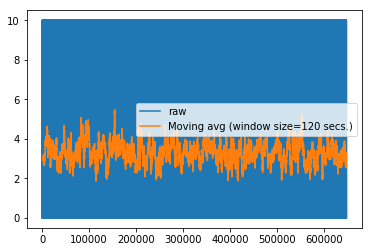

In [1011]:
speeds = all_players_actions["speed_magnitude"].tolist()
raw, = plt.plot(speeds, '-', label="raw")
window_size_in_secs = 120
window_size = int(round(window_size_in_secs / seconds_between_events))
print(window_size)

r_mean = running_mean(speeds, N = window_size)
rm, = plt.plot(range(window_size - 1, len(speeds)), r_mean, label='Moving avg (window size=%d secs.)' % (window_size_in_secs))
plt.legend(handles=[raw, rm])
# plt.xlim([2.5e6, 2.5e6 + 3000])

In [1012]:
print(len(all_players_actions.index))
print(len(all_players_actions.index.unique()))

648002
648002


In [1013]:
all_players_actions.index[0:10]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [1014]:
all_players_actions.index.max()

648001

In [1015]:
all_players_actions[:3]

,Step,AgentID,timestamp,pos_x,pos_y,speed_x,speed_y,speed_magnitude,topuck_x,topuck_y,angle2puck,last_action,have_puck,can_see_puck,can_reach_puck
0,0,forward_b549cc78-172a-4727-ae59-db7af945da95,0.05,99.000000,84.000000,-0.007625,-0.006470,0.01,-99.000000,-84.000000,"Angle in radians = 0.000 (Pi/2: 1.571, Pi:3.14...",NaN,False,True,False
1,1,forward_b549cc78-172a-4727-ae59-db7af945da95,0.10,98.000381,83.000323,0.007625,0.006470,0.01,-97.875381,-82.875323,"Angle in radians = 3.141 (Pi/2: 1.571, Pi:3.14...","Move => speed = 0.01 feet/sec, direction = Ang...",False,False,False
2,2,forward_b549cc78-172a-4727-ae59-db7af945da95,0.15,98.381636,83.323812,7.625091,6.469774,10.00,-98.256636,-83.198812,"Angle in radians = 3.141 (Pi/2: 1.571, Pi:3.14...","Move => speed = 10.00 feet/sec, direction = An...",False,False,False


Text(0.5,1,'Number of seconds between grabs')

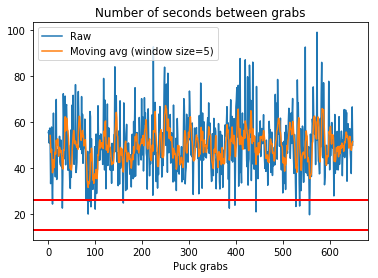

In [1016]:
timestamps_grabs = agents_df.iloc[df_succ_grabs.index]["timestamp"].tolist()
seconds_between = [(time2 - time1) for time1, time2 in zip(timestamps_grabs, timestamps_grabs[1:])]
seconds_between_plot, = plt.plot(seconds_between, label='Raw')
window_size = 5
r_mean = running_mean(seconds_between, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(seconds_between)), r_mean, label='Moving avg (window size=%d)' % (window_size))
# max_theoretical, = plt.axhline(y=9,linewidth=4, color='r', label='max secs (thoretical)')
# for experiment with ONLY 10 ft/sec, 13 secs is the optimal
num_min_secs = 13
plt.axhline(y=num_min_secs,linewidth=2, color='r', label='max secs (thoretical)')
plt.axhline(y=num_min_secs * 2,linewidth=2, color='r', label='max secs (thoretical)')
plt.legend(handles=[seconds_between_plot, moving_avg_plot])


plt.xlabel("Puck grabs")
# plt.ylabel("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
plt.title("Number of seconds between grabs")
# plt.xlim([3500, 5500])
# plt.ylim([0, 75])


In [1017]:
import math
bucket_in_minutes = 5
events_with_puck = []
for curr_minute in range(0, int(math.ceil(max_timestamp_in_minutes)), bucket_in_minutes):
    min_second = curr_minute * 60 # (curr_minute - bucket_in_minutes) * 60
    max_second = min_second + bucket_in_minutes * 60 # curr_minute * (bucket_in_minutes * 60)
    num_events = len(
        all_players_actions[
            all_players_actions.timestamp.between(left=min_second, right=max_second) & \
            all_players_actions['have_puck'] == True
        ]
    )
    events_with_puck.append(num_events)
    # print("second: %d, num events: %d" % (curr_second, num_events))
    # len(all_players_actions[all_players_actions['timestamp'] <= curr_second))

540 minutes, so there are 109 buckets of 5' long each


Text(0.5,1,"Number of 'grab's (per 5 minutes)")

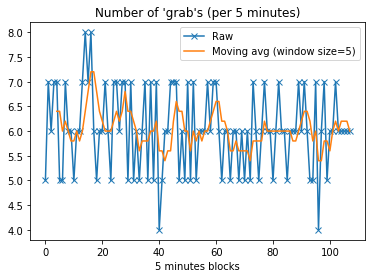

In [1018]:
print("%d minutes, so there are %d buckets of %d' long each" % (max_timestamp_in_minutes, max_timestamp_in_minutes//bucket_in_minutes + 1, bucket_in_minutes))
events_with_puck_plot, = plt.plot(events_with_puck, 'x-', label="Raw")
window_size = 5
r_mean = running_mean(events_with_puck, N = window_size)
moving_avg_plot, = plt.plot(range(window_size - 1, len(events_with_puck)), r_mean, label='Moving avg (window size=%d)' % (window_size))
plt.legend(handles=[events_with_puck_plot, moving_avg_plot])

plt.xlabel("%d minutes blocks" % bucket_in_minutes)
# plt.ylabel("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
plt.title("Number of 'grab's (per %d minutes)" % bucket_in_minutes)
# plt.xlim([len(events_with_puck) - 100, len(events_with_puck)])
# print("Only plotting from block %d to %d" % (len(events_with_puck) - 100, len(events_with_puck)))

In [1019]:
import pickle
from hockey.behaviour.core.action import HockeyAction
from hockey.behaviour.core.bitstring_environment_state import BitstringEnvironmentState

brain_file = "/Users/luisd/luis-simulation/models/brainfetchpuck_minmoves2.bin"
model = pickle.load(open(brain_file, 'rb'))
print("%d rules read." % (len(model)))
best_fitness_rule_and_fitness = (None, -10)
for rule in model:
#     if rule.fitness > .5:
#         print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
    if  rule.action == HockeyAction.GRAB_PUCK:
        print(rule.condition, '=>', rule.action, ' [%.5f, experience: %d]' % (rule.fitness, rule.experience))
        if best_fitness_rule_and_fitness[1] < rule.fitness:
            best_fitness_rule_and_fitness = (rule, rule.fitness)
best_rule = best_fitness_rule_and_fitness[0]
print("Best rule for 'GRAB_PUCK' is ")
print(best_rule.condition, '=>', best_rule.action, ' [%.5f, experience: %d]' % (best_rule.fitness, best_rule.experience))
print(BitstringEnvironmentState.explain_condition(condition=best_fitness_rule_and_fitness[0].condition))

179 rules read.
100##1#0#1#10####0#### => GRAB_PUCK  [0.28834, experience: 2]
100#1#10#11#00#100#00# => GRAB_PUCK  [0.00001, experience: 0]
10#011#1#0##0#01####00 => GRAB_PUCK  [0.01598, experience: 0]
1000###111000010###00# => GRAB_PUCK  [0.00001, experience: 0]
1#0#1#110##100#0000##0 => GRAB_PUCK  [0.00001, experience: 0]
100#10010101#01000000# => GRAB_PUCK  [0.15001, experience: 1]
1000#0#10###0011#00000 => GRAB_PUCK  [0.00001, experience: 0]
##001000#10100#1##0000 => GRAB_PUCK  [0.00001, experience: 0]
1#0#1000##0100#0100#00 => GRAB_PUCK  [0.15001, experience: 1]
#000#0#0#101000#00#0#0 => GRAB_PUCK  [0.00001, experience: 0]
100##1#0#1#10#0##0#### => GRAB_PUCK  [0.02883, experience: 0]
1#00101#1001###10###00 => GRAB_PUCK  [0.00001, experience: 0]
Best rule for 'GRAB_PUCK' is 
100##1#0#1#10####0#### => GRAB_PUCK  [0.28834, experience: 2]
attacking = True; 
have_puck = False; 
my_team_has_puck = False; 
bit_0_distance_to_puck = True; 
bit_2_distance_to_puck = False; 
bit_4_distance_to

# SCRATCH PAPER DOWN HERE

In [1020]:
import numpy as np
import pandas as pd
df=pd.DataFrame({'A':np.random.random(20),'B':np.random.random(20)})


In [1021]:
df


,A,B
0,0.162791,0.377116
1,0.860541,0.229914
2,0.860401,0.524419
3,0.664806,0.286480
4,0.533045,0.235365
5,0.710623,0.699154
6,0.018529,0.048206
7,0.708164,0.837460
8,0.814267,0.061871
9,0.165525,0.410730


In [1022]:
df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()

,A,B
B,,
"(0.0, 0.155]",3.134584,0.383721
"(0.155, 0.31]",2.983488,0.986108
"(0.31, 0.465]",1.046244,1.942580
"(0.465, 0.62]",0.860401,0.524419
"(0.62, 0.775]",0.710623,0.699154
"(0.775, 0.93]",2.155998,2.482795
"(0.93, 1.085]",NaN,NaN


[]

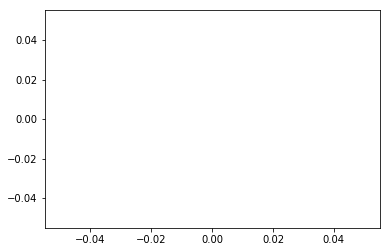

In [1023]:
plt.plot()

In [1024]:
import plotly
plotly.__version__

'2.1.0'

In [1025]:
# import plotly.plotly as py
# from plotly.figure_factory import create_quiver
    
# import math
    
# # 1 Arrow from (0,0) to (1,1)
# fig = create_quiver(x=[10], y=[-1], u=[1], v=[1], scale=1)    
# py.iplot(fig, filename='quiver')
# fig2 = create_quiver(x=[0], y=[1], u=[1], v=[1], scale=1)    
# py.iplot(fig2, filename='quiver')

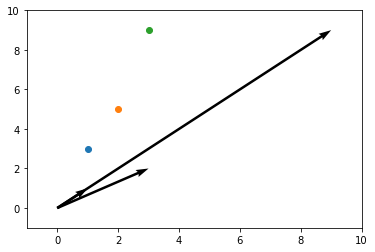

In [1026]:
import numpy as np
import matplotlib.pyplot as plt

soa = np.array([[0, 0, 3, 2], [0, 0, 1, 1], [0, 0, 9, 9]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()

plt.plot([(1,2, 3)], [(3,5, 9)],'o')
plt.show()


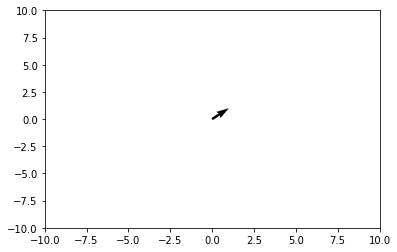

In [1027]:
# plt.quiver([0, 0, 0], [0, 0, 0], [1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.quiver([0], [0], [1], [1], angles='xy', scale_units='xy', scale=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()